In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.model_selection import train_test_split

In [67]:
df=pd.read_csv('GOOG.csv')

In [68]:
df.head()

symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [69]:
df.isnull().sum() #checking for any null values

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [70]:
print("date datatype - ",type(df['date'][0]))

date datatype -  <class 'str'>


In [71]:
print(df['date'][0])

2016-06-14 00:00:00+00:00


In [72]:
df['date']=pd.to_datetime(df.date) #changing str to datetime

In [73]:
df['date']=df['date'].dt.date #removing time from date

In [74]:
print(df['date'][0])

2016-06-14


In [75]:
df.head()

symbol        date   close    high       low    open   volume  adjClose  \
0   GOOG  2016-06-14  718.27  722.47  713.1200  716.48  1306065    718.27   
1   GOOG  2016-06-15  718.92  722.98  717.3100  719.00  1214517    718.92   
2   GOOG  2016-06-16  710.36  716.65  703.2600  714.91  1982471    710.36   
3   GOOG  2016-06-17  691.72  708.82  688.4515  708.65  3402357    691.72   
4   GOOG  2016-06-20  693.71  702.48  693.4100  698.77  2082538    693.71   

   adjHigh    adjLow  adjOpen  adjVolume  divCash  splitFactor  
0   722.47  713.1200   716.48    1306065      0.0          1.0  
1   722.98  717.3100   719.00    1214517      0.0          1.0  
2   716.65  703.2600   714.91    1982471      0.0          1.0  
3   708.82  688.4515   708.65    3402357      0.0          1.0  
4   702.48  693.4100   698.77    2082538      0.0          1.0

In [76]:
df=df.drop(['symbol'],axis=1)
df.head()

date   close    high       low    open   volume  adjClose  adjHigh  \
0  2016-06-14  718.27  722.47  713.1200  716.48  1306065    718.27   722.47   
1  2016-06-15  718.92  722.98  717.3100  719.00  1214517    718.92   722.98   
2  2016-06-16  710.36  716.65  703.2600  714.91  1982471    710.36   716.65   
3  2016-06-17  691.72  708.82  688.4515  708.65  3402357    691.72   708.82   
4  2016-06-20  693.71  702.48  693.4100  698.77  2082538    693.71   702.48   

     adjLow  adjOpen  adjVolume  divCash  splitFactor  
0  713.1200   716.48    1306065      0.0          1.0  
1  717.3100   719.00    1214517      0.0          1.0  
2  703.2600   714.91    1982471      0.0          1.0  
3  688.4515   708.65    3402357      0.0          1.0  
4  693.4100   698.77    2082538      0.0          1.0

In [77]:
df.set_index('date')

close      high        low     open   volume  adjClose  \
date                                                                   
2016-06-14   718.27   722.470   713.1200   716.48  1306065    718.27   
2016-06-15   718.92   722.980   717.3100   719.00  1214517    718.92   
2016-06-16   710.36   716.650   703.2600   714.91  1982471    710.36   
2016-06-17   691.72   708.820   688.4515   708.65  3402357    691.72   
2016-06-20   693.71   702.480   693.4100   698.77  2082538    693.71   
...             ...       ...        ...      ...      ...       ...   
2021-06-07  2466.09  2468.000  2441.0725  2451.32  1192453   2466.09   
2021-06-08  2482.85  2494.495  2468.2400  2479.90  1253253   2482.85   
2021-06-09  2491.40  2505.000  2487.3300  2499.50  1006337   2491.40   
2021-06-10  2521.60  2523.260  2494.0000  2494.01  1561733   2521.60   
2021-06-11  2513.93  2526.990  2498.2900  2524.92  1262309   2513.93   

             adjHigh     adjLow  adjOpen  adjVolume  divCash  splitFactor  
date                                                                       
2016-06-14   722.470   713.1200   716.48    1306065      0.0          1.0  
2016-06-15   722.980   717.3100   719.00    1214517      0.0          1.0  
2016-06-16   716.650   703.2600   714.91    1982471      0.0          1.0  
2016-06-17   708.820   688.4515   708.65    3402357      0.0          1.0  
2016-06-20   702.480   693.4100   698.77    2082538      0.0          1.0  
...              ...        ...      ...        ...      ...          ...  
2021-06-07  2468.000  2441.0725  2451.32    1192453      0.0          1.0  
2021-06-08  2494.495  2468.2400  2479.90    1253253      0.0          1.0  
2021-06-09  2505.000  2487.3300  2499.50    1006337      0.0          1.0  
2021-06-10  2523.260  2494.0000  2494.01    1561733      0.0          1.0  
2021-06-11  2526.990  2498.2900  2524.92    1262309      0.0          1.0  

[1258 rows x 12 columns]

In [78]:
df=df[-255:] #taking only one year stock
df.shape

(255, 13)

In [79]:
df.set_index('date')
df.head()

date    close     high      low     open   volume  adjClose  \
1003  2020-06-09  1456.16  1468.00  1443.21  1445.36  1409249   1456.16   
1004  2020-06-10  1465.85  1474.26  1456.27  1459.54  1525153   1465.85   
1005  2020-06-11  1403.84  1454.47  1402.00  1442.48  1991332   1403.84   
1006  2020-06-12  1413.18  1437.00  1386.02  1428.49  1946367   1413.18   
1007  2020-06-15  1419.85  1424.80  1387.92  1390.80  1506096   1419.85   

      adjHigh   adjLow  adjOpen  adjVolume  divCash  splitFactor  
1003  1468.00  1443.21  1445.36    1409249      0.0          1.0  
1004  1474.26  1456.27  1459.54    1525153      0.0          1.0  
1005  1454.47  1402.00  1442.48    1991332      0.0          1.0  
1006  1437.00  1386.02  1428.49    1946367      0.0          1.0  
1007  1424.80  1387.92  1390.80    1506096      0.0          1.0

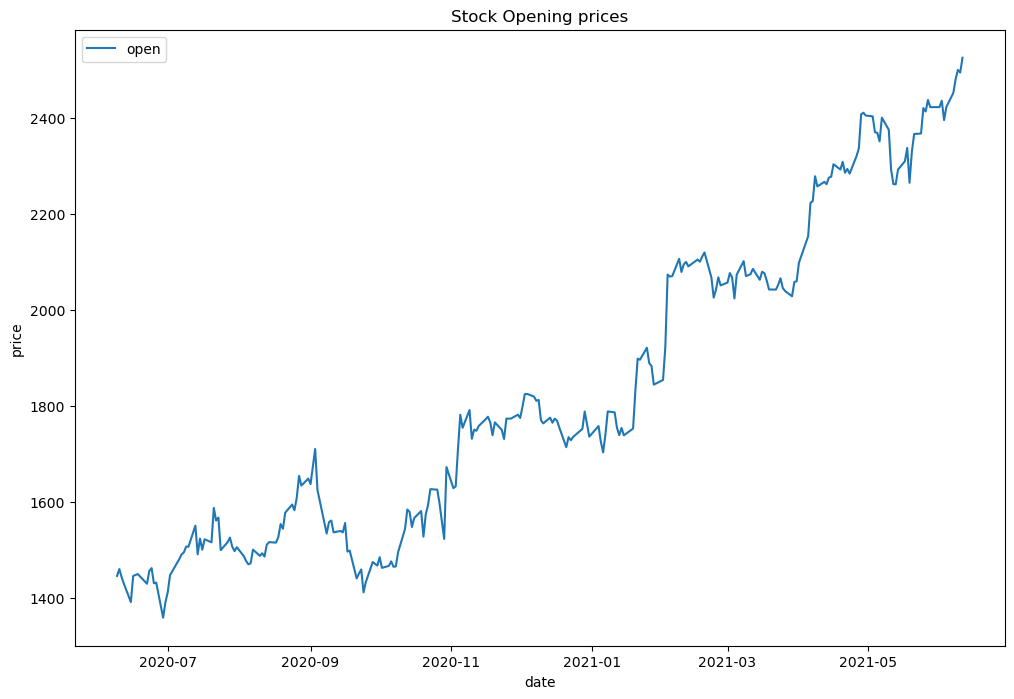

In [80]:
plt.plot(df.date,df.open,label='open')

plt.title('Stock Opening prices')
plt.xlabel('date')
plt.ylabel('price')

plt.legend()
plt.show()

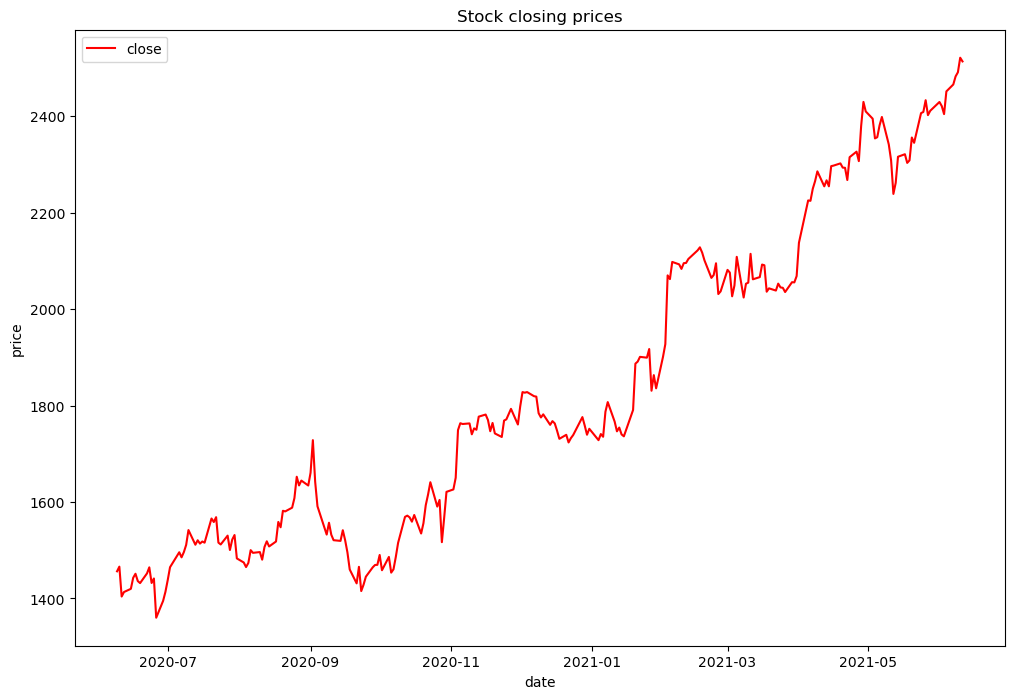

In [81]:
plt.plot(df.date,df.close,label='close',color='red')

plt.title('Stock closing prices')
plt.xlabel('date')
plt.ylabel('price')

plt.legend()
plt.show()

In [82]:
# separating required data for model
data=df[['date','close']]
data.head()

date    close
1003  2020-06-09  1456.16
1004  2020-06-10  1465.85
1005  2020-06-11  1403.84
1006  2020-06-12  1413.18
1007  2020-06-15  1419.85

In [83]:
#resetting index
data=data.reset_index()
data=data.drop('index',axis=1)
data=data.set_index('date')
data.head()

close
date               
2020-06-09  1456.16
2020-06-10  1465.85
2020-06-11  1403.84
2020-06-12  1413.18
2020-06-15  1419.85

In [122]:
# Preprocessing data
# scaler=MinMaxScaler(feature_range=(0,1))
# scaled_close=scaler.fit_transform(data)
close=[]
for i in data['close']:
    close.append(i)

In [125]:
close=np.array(close)

In [126]:
type(close)

numpy.ndarray

In [127]:
data.shape

(255, 1)

In [128]:
data.describe()

close
count   255.000000
mean   1830.883412
std     325.872688
min    1359.900000
25%    1526.110000
50%    1760.060000
75%    2087.295000
max    2521.600000

In [129]:
prediction_days=28

In [130]:
x_train=[]
y_train=[]

In [131]:
#preparing dpendent and independent values
for i in range(len(close)-28):
    x_train.append(close[i:i+prediction_days])
    y_train.append(close[i+prediction_days])

In [132]:
x_train[0] #first 28 days stock

array([1456.16, 1465.85, 1403.84, 1413.18, 1419.85, 1442.72, 1451.12,
       1435.96, 1431.72, 1451.86, 1464.41, 1431.97, 1441.33, 1359.9 ,
       1394.97, 1413.61, 1438.04, 1464.7 , 1495.7 , 1485.18, 1496.  ,
       1510.99, 1541.74, 1511.34, 1520.58, 1513.64, 1518.  , 1515.55])

In [133]:
y_train[0] # 28th day stock

1565.72

In [134]:
#spliting data in train and test
train_len=int(len(y_train)*0.80)
X_train=x_train[:train_len]
Y_train=y_train[:train_len]
X_test=x_train[train_len:]
Y_test=y_train[train_len:]

In [135]:
X_train,Y_train,X_test,Y_test=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)

In [136]:
type(X_train)

numpy.ndarray

In [137]:
len(X_train)

181

In [138]:
X_train,X_test=X_train.reshape(len(X_train),28),X_test.reshape(len(X_test),28)

In [139]:
print(len(X_train))
print(len(X_test))

181
46


In [140]:
#building the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [141]:
model.fit(X_train,Y_train)

LinearRegression()

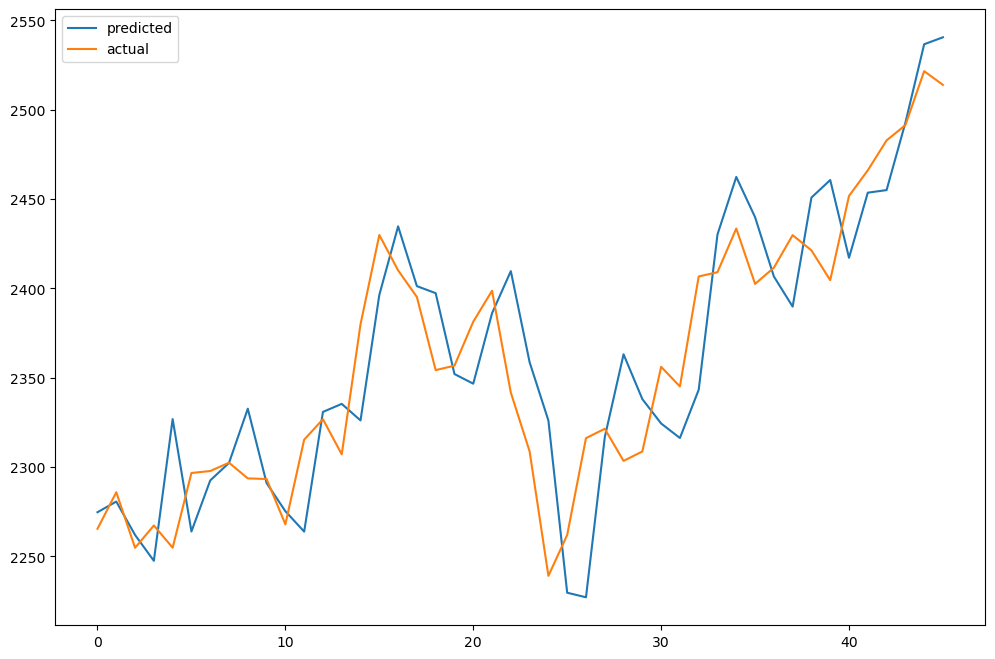

In [142]:
pred=model.predict(X_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(pred,label="predicted")
plt.plot(Y_test,label="actual")
plt.legend(loc="upper left")
plt.show()